<a href="https://colab.research.google.com/github/misbah38/DSAI-Batch-4/blob/main/Assignment_2_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import Essential Libraries ***

In [58]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
import warnings
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

**Import Data from google Drive to Google Colab**

In [60]:
import cv2
import imghdr

In [61]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [62]:
# to copy a folder from google drive to google colab
import shutil

In [63]:
# Source path in Google Drive
source_path = '/content/gdrive/My Drive/brain_tumor_dataset'

# Destination path in Colab environment (you can specify your desired location)
destination_path = '/content/brain_tumor_dataset'

# Copy the entire folder from Google Drive to Colab
shutil.copytree(source_path, destination_path)


FileExistsError: ignored

In [64]:
data_dir='brain_tumor_dataset'

In [65]:
os.listdir(data_dir)

['yes', 'no']

In [66]:
image_exts=['jpeg','jpg','bmp','png']


In [67]:
for image_class in os.listdir(data_dir):
  print(image_class)

yes
no


In [68]:
img= cv2.imread(os.path.join('brain_tumor_dataset'))


In [69]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext lis{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remvove(image_path)


**Load Data**

In [70]:
tf.data.dataset??

Object `tf.data.dataset` not found.


In [71]:
#tf.keras.utils.image_dataset_from_directory??

In [72]:
data=tf.keras.utils.image_dataset_from_directory('brain_tumor_dataset')

Found 250 files belonging to 2 classes.


In [73]:
data_iterator=data.as_numpy_iterator()

In [74]:
data_iterator

In [75]:
# get another batch from the interator
batch=data_iterator.next()

In [76]:
# images represented as numpy arrays (either yes or no)
batch[0].shape

(32, 256, 256, 3)

In [77]:
# these represented teh label (either yes or no)
batch[1]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

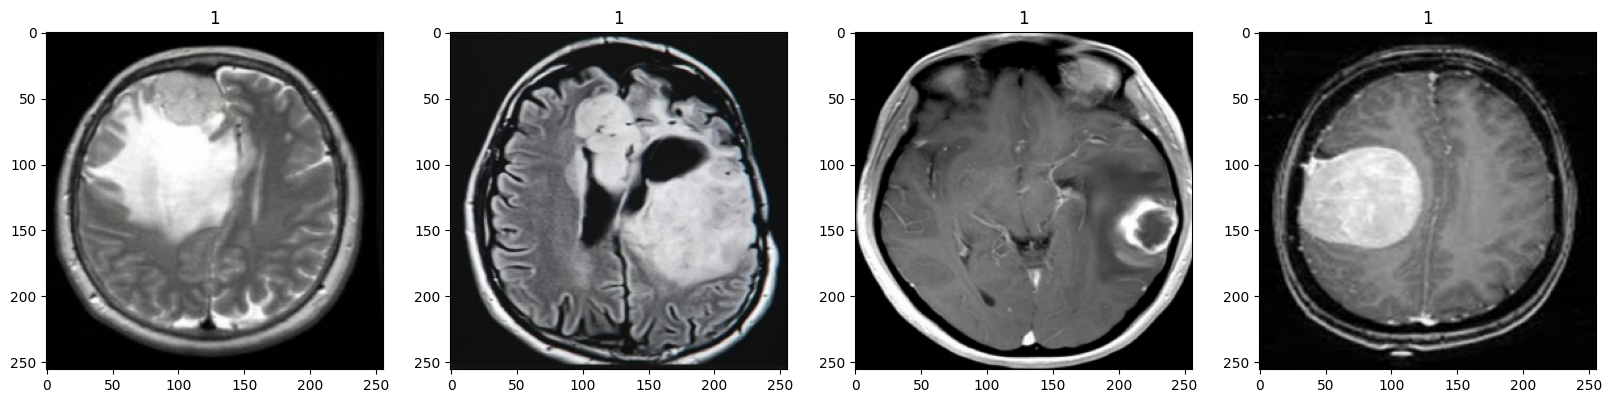

In [78]:
# this shows that [0]is for no (no tumor) and [1] is for yes(having tumor)
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Preprocess Data**

Scale Data

In [79]:

data=data.map(lambda x,y:(x/255,y))

In [80]:
scaled_iterator=data.as_numpy_iterator()

In [81]:
batch=scaled_iterator.next()


In [82]:
batch[0].max()

1.0

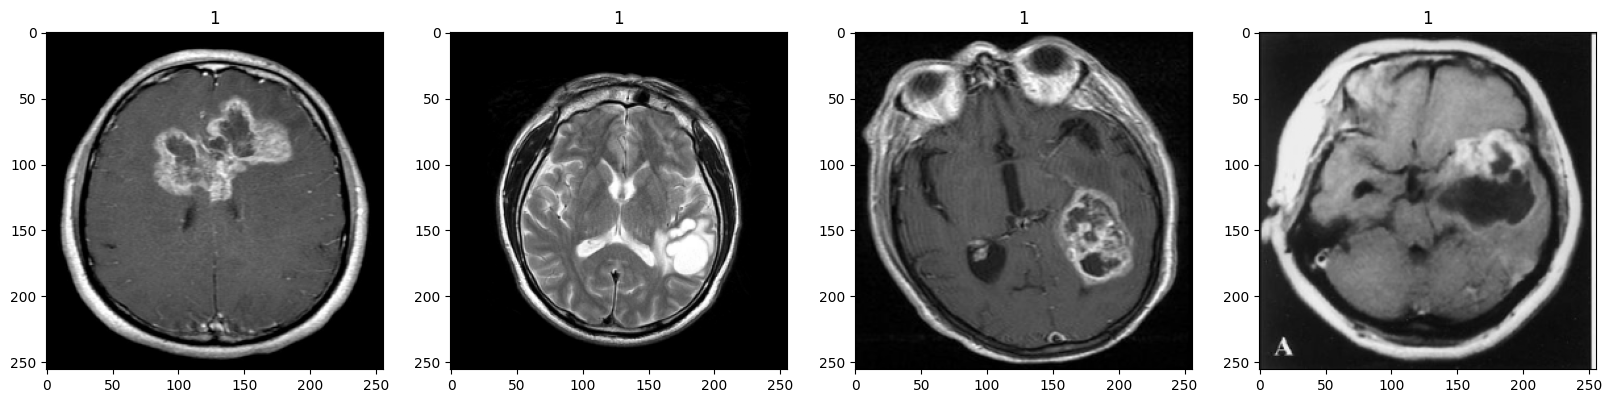

In [83]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Split Data

In [84]:
len(data)

8

In [94]:
train_size=int(len(data)*.7) #70% data
val_size=int(len(data)*.2)+1 #30%
test_size=int(len(data)*.1)+1 #20%

In [95]:
train_size + val_size + test_size

8

In [97]:
# we use take and skip methods in tensorflow pipeline
# take define how much data we take for partition
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

**Deep Learning Model**

In [102]:
model=Sequential()

In [108]:
#convolutional layer
                 #16 filters (3*3 pixels in size) 1 stride 1
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [112]:
# Adam is an optimizer
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        4

**Train**

In [115]:
logdir='logs'

In [116]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [117]:
# 1 epoch = 1 run
hist=model.fit(train,epochs=20, validation_data=val,callbacks=[tensorboard_callback])
# the decrease in loss increases the accuracy rate

Epoch 1/20
5/5 [==============================] - 16s 260ms/step - loss: 0.6893 - accuracy: 0.6375 - val_loss: 0.6816 - val_accuracy: 0.6250
Epoch 2/20
5/5 [==============================] - 1s 168ms/step - loss: 0.6752 - accuracy: 0.6187 - val_loss: 0.6714 - val_accuracy: 0.5938
Epoch 3/20
5/5 [==============================] - 1s 216ms/step - loss: 0.6675 - accuracy: 0.6062 - val_loss: 0.6366 - val_accuracy: 0.6406
Epoch 4/20
5/5 [==============================] - 1s 164ms/step - loss: 0.6305 - accuracy: 0.6562 - val_loss: 0.6655 - val_accuracy: 0.5938
Epoch 5/20
5/5 [==============================] - 1s 165ms/step - loss: 0.6353 - accuracy: 0.5938 - val_loss: 0.6156 - val_accuracy: 0.6875
Epoch 6/20
5/5 [==============================] - 2s 389ms/step - loss: 0.6046 - accuracy: 0.6750 - val_loss: 0.5337 - val_accuracy: 0.8125
Epoch 7/20
5/5 [==============================] - 1s 168ms/step - loss: 0.5682 - accuracy: 0.7375 - val_loss: 0.5288 - val_accuracy: 0.7500
Epoch 8/20
5/5 [===

In [118]:
hist.history

{'loss': [0.6893208026885986,
  0.6751669645309448,
  0.6674644351005554,
  0.6305117607116699,
  0.6353181600570679,
  0.6046473979949951,
  0.5681535005569458,
  0.5193659663200378,
  0.5902422666549683,
  0.5027537941932678,
  0.5476940274238586,
  0.5321707129478455,
  0.4678995609283447,
  0.49583786725997925,
  0.3901441991329193,
  0.3894622325897217,
  0.3796411454677582,
  0.3830668330192566,
  0.4530349373817444,
  0.4247848391532898],
 'accuracy': [0.637499988079071,
  0.6187499761581421,
  0.606249988079071,
  0.65625,
  0.59375,
  0.675000011920929,
  0.737500011920929,
  0.7437499761581421,
  0.706250011920929,
  0.78125,
  0.768750011920929,
  0.737500011920929,
  0.793749988079071,
  0.7749999761581421,
  0.8187500238418579,
  0.84375,
  0.831250011920929,
  0.831250011920929,
  0.793749988079071,
  0.8062499761581421],
 'val_loss': [0.681608259677887,
  0.671359658241272,
  0.636583149433136,
  0.6655140519142151,
  0.6156107187271118,
  0.5336888432502747,
  0.5288093

Plot Performance

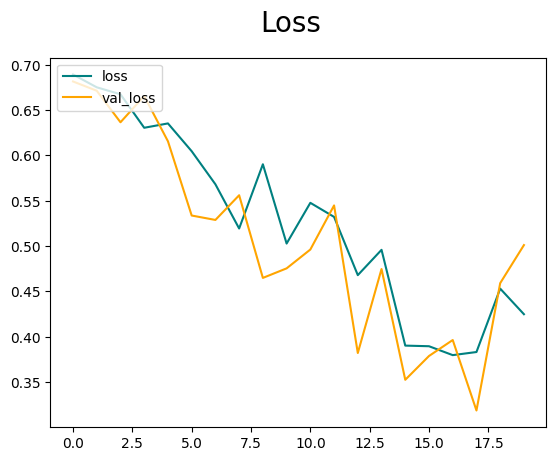

In [121]:
fig= plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

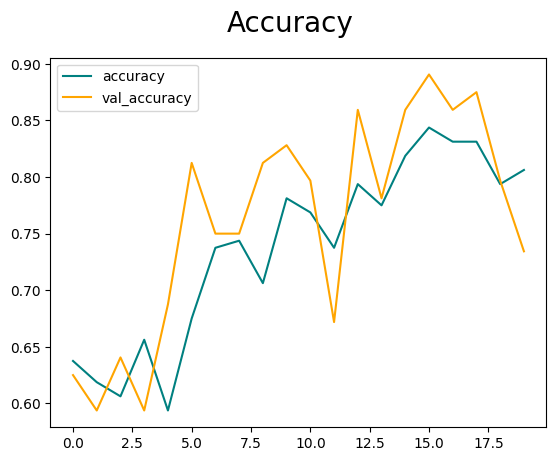

In [122]:
fig= plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

**Evaluate Performance**

Evaluate

In [123]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [124]:
len(test)

1

In [128]:
for batch in test.as_numpy_iterator():
  X,y =batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 690ms/step


In [129]:
print(f" Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}" )

 Precision:0.75,Recall:1.0,Accuracy:0.7692307829856873


Test

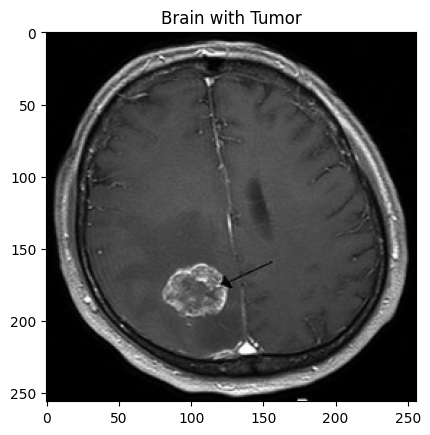

In [130]:
img, label = batch[0][15], batch[1][15]
plt.imshow(img)
if label==1:
    plt.title("Brain with Tumor")
else:
    plt.title("Brain with No Tumor")
plt.show()

In [131]:
yhat = model.predict(np.expand_dims(img, 0))

1/1 [==============================] - 0s 243ms/step


In [132]:
yhat

array([[0.8842247]], dtype=float32)

In [134]:
if yhat < 0.5:
    print("No tumor detected")
else:
    print("Tumor detected")

Tumor detected
